<a href="https://colab.research.google.com/github/MonaRansing/India-Vs-Shri-Lanka-T20-Match-Analysis-/blob/main/India_vs_Shri_Lanka_T20_ODI(30_July_2024)_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# Import all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import calendar
import warnings
warnings.filterwarnings('ignore')

In [97]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# read csv
df = pd.read_csv('/content/drive/MyDrive/Almabetter/Data Science/dataset/India Vs Shrilanka.csv')

In [99]:
# First look
df.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.1,India,Sri Lanka,YBK Jaiswal,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.2,India,Sri Lanka,YBK Jaiswal,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.3,India,Sri Lanka,Shubman Gill,YBK Jaiswal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.4,India,Sri Lanka,Shubman Gill,YBK Jaiswal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.5,India,Sri Lanka,YBK Jaiswal,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
df.tail()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
252,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,3,0.1,Sri Lanka,India,BKG Mendis,MDKJ Perera,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,3,0.2,Sri Lanka,India,BKG Mendis,MDKJ Perera,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,3,0.3,Sri Lanka,India,MDKJ Perera,BKG Mendis,...,0,NaN,NaN,NaN,NaN,NaN,caught,MDKJ Perera,NaN,NaN
255,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,3,0.4,Sri Lanka,India,P Nissanka,BKG Mendis,...,0,NaN,NaN,NaN,NaN,NaN,caught,P Nissanka,NaN,NaN
256,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,4,0.1,India,Sri Lanka,SA Yadav,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
# shape of dataset
df.shape

(257, 22)

In [102]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                257 non-null    int64  
 1   season                  257 non-null    int64  
 2   start_date              257 non-null    object 
 3   venue                   257 non-null    object 
 4   innings                 257 non-null    int64  
 5   ball                    257 non-null    float64
 6   batting_team            257 non-null    object 
 7   bowling_team            257 non-null    object 
 8   striker                 257 non-null    object 
 9   non_striker             257 non-null    object 
 10  bowler                  257 non-null    object 
 11  runs_off_bat            257 non-null    int64  
 12  extras                  257 non-null    int64  
 13  wides                   13 non-null     float64
 14  noballs                 0 non-null      fl

In [103]:
# description of dataset
df.describe()

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,257.0,257.0,257.000000,257.000000,257.000000,257.000000,13.000000,0.0,0.0,4.0,0.0,0.0,0.0
mean,1442989.0,2024.0,1.536965,9.765409,1.019455,0.070039,1.076923,NaN,NaN,1.0,NaN,NaN,NaN
std,0.0,0.0,0.551627,5.913454,1.306389,0.270556,0.277350,NaN,NaN,0.0,NaN,NaN,NaN
min,1442989.0,2024.0,1.000000,0.100000,0.000000,0.000000,1.000000,NaN,NaN,1.0,NaN,NaN,NaN
25%,1442989.0,2024.0,1.000000,4.500000,0.000000,0.000000,1.000000,NaN,NaN,1.0,NaN,NaN,NaN
50%,1442989.0,2024.0,2.000000,9.500000,1.000000,0.000000,1.000000,NaN,NaN,1.0,NaN,NaN,NaN
75%,1442989.0,2024.0,2.000000,15.100000,1.000000,0.000000,1.000000,NaN,NaN,1.0,NaN,NaN,NaN
max,1442989.0,2024.0,4.000000,19.600000,6.000000,2.000000,2.000000,NaN,NaN,1.0,NaN,NaN,NaN


In [104]:
# Copy main dataset
df1 = df.copy()

In [105]:
df1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.1,India,Sri Lanka,YBK Jaiswal,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.2,India,Sri Lanka,YBK Jaiswal,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.3,India,Sri Lanka,Shubman Gill,YBK Jaiswal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.4,India,Sri Lanka,Shubman Gill,YBK Jaiswal,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1442989,2024,2024-07-30,Pallekele International Cricket Stadium,1,0.5,India,Sri Lanka,YBK Jaiswal,Shubman Gill,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
# columns in the dataset
df1.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [107]:
# Duplicate Value Count
duplicate_values = df1.duplicated().sum()
print(duplicate_values)

0


In [108]:
# find out missing values
missing_values = df1.isnull().sum().reset_index().sort_index(ascending=False)
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values[missing_values['missing_count']>0]
print(missing_values)

               column_name  missing_count
21  other_player_dismissed            257
20       other_wicket_type            257
19        player_dismissed            238
18             wicket_type            238
17                 penalty            257
16                 legbyes            253
15                    byes            257
14                 noballs            257
13                   wides            244


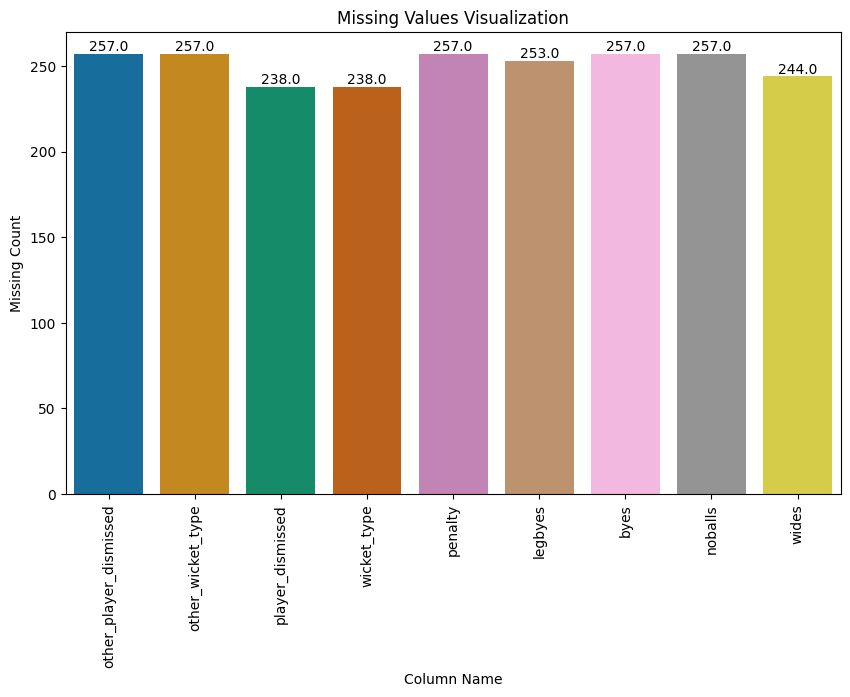

In [109]:
# visualize missing values

# Define a color palette
color_palette = sns.color_palette("colorblind")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='column_name', y='missing_count', data=missing_values, palette=color_palette)
plt.xticks(rotation=90)
plt.xlabel('Column Name')
plt.ylabel('Missing Count')
plt.title('Missing Values Visualization')

#adding the exact values on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [110]:
# Check unique values
df1.nunique()

,0
match_id,1
season,1
start_date,1
venue,1
innings,4
ball,130
batting_team,2
bowling_team,2
striker,20
non_striker,16


### **Data Wrangling**

In [111]:
# Handling missing values
# drop unnessary columns
df1.drop(columns=['noballs', 'byes', 'penalty', 'other_wicket_type', 'other_player_dismissed'], inplace=True)


In [112]:
df1.drop(columns=['venue','match_id'], inplace=True)

In [113]:
df1.drop(columns=['season'], inplace=True)

In [114]:
df1.head()

,start_date,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,legbyes,wicket_type,player_dismissed
0,2024-07-30,1,0.1,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,0,0,NaN,NaN,NaN,NaN
1,2024-07-30,1,0.2,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,1,0,NaN,NaN,NaN,NaN
2,2024-07-30,1,0.3,India,Sri Lanka,Shubman Gill,YBK Jaiswal,C Wickramasinghe,0,0,NaN,NaN,NaN,NaN
3,2024-07-30,1,0.4,India,Sri Lanka,Shubman Gill,YBK Jaiswal,C Wickramasinghe,1,0,NaN,NaN,NaN,NaN
4,2024-07-30,1,0.5,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,1,0,NaN,NaN,NaN,NaN


In [115]:
df1.tail()

,start_date,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,legbyes,wicket_type,player_dismissed
252,2024-07-30,3,0.1,Sri Lanka,India,BKG Mendis,MDKJ Perera,Washington Sundar,0,1,1.0,NaN,NaN,NaN
253,2024-07-30,3,0.2,Sri Lanka,India,BKG Mendis,MDKJ Perera,Washington Sundar,1,0,NaN,NaN,NaN,NaN
254,2024-07-30,3,0.3,Sri Lanka,India,MDKJ Perera,BKG Mendis,Washington Sundar,0,0,NaN,NaN,caught,MDKJ Perera
255,2024-07-30,3,0.4,Sri Lanka,India,P Nissanka,BKG Mendis,Washington Sundar,0,0,NaN,NaN,caught,P Nissanka
256,2024-07-30,4,0.1,India,Sri Lanka,SA Yadav,Shubman Gill,M Theekshana,4,0,NaN,NaN,NaN,NaN


In [116]:
# replace values from wides and legbyes columns
df1['wides'].fillna(0, inplace=True)
df1['legbyes'].fillna(0, inplace=True)

In [117]:
# replace values from wicket type and player dismissed column
df1['wicket_type'].fillna('Not Out', inplace=True)
df1['player_dismissed'].fillna('None', inplace=True)

In [118]:
df1.head()

,start_date,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,legbyes,wicket_type,player_dismissed
0,2024-07-30,1,0.1,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,0,0,0.0,0.0,Not Out,None
1,2024-07-30,1,0.2,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,1,0,0.0,0.0,Not Out,None
2,2024-07-30,1,0.3,India,Sri Lanka,Shubman Gill,YBK Jaiswal,C Wickramasinghe,0,0,0.0,0.0,Not Out,None
3,2024-07-30,1,0.4,India,Sri Lanka,Shubman Gill,YBK Jaiswal,C Wickramasinghe,1,0,0.0,0.0,Not Out,None
4,2024-07-30,1,0.5,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,1,0,0.0,0.0,Not Out,None


In [119]:
# conver start date to datetime format
df1['start_date'] = pd.to_datetime(df1['start_date'])

In [120]:
# create a new column
df1['boundry'] = df1['runs_off_bat'].apply(lambda x: 'Yes' if x in [4, 6] else 'No')

## Data Visualization

# **Runs Scored By Both Teams**

In [121]:
df1.shape

(257, 15)

In [122]:
# runs scored by india
india_runs_off_bat = df1[(df1['batting_team'] == 'India') & (df1['innings'] == 1)]['runs_off_bat']
india_runs_off_bat

,runs_off_bat
0,0
1,1
2,0
3,1
4,1
...,...
120,2
121,0
122,6
123,0


In [123]:
# extra runs of india
india_extras = df1[(df1['batting_team'] == 'India') & (df1['innings'] == 1)]['extras']

In [124]:
# total runs
total_runs_1 = (india_runs_off_bat.sum() + india_extras.sum())
total_runs_1

137

In [125]:
# runs scored by shrilanka
srilanka_runs_off_bat = df1[(df1['batting_team'] == 'Sri Lanka') & (df1['innings'] == 2)]['runs_off_bat'].sum()
srilanka_runs_off_bat

# extra
srilanka_extras = df1[(df1['batting_team'] == 'Sri Lanka') & (df1['innings'] == 2)]['extras'].sum()
srilanka_extras

# total runs
total_runs_2 = (srilanka_runs_off_bat + srilanka_extras)
total_runs_2

137

After 20 overs score of both match was same therefore they played superover. 3rd inning was played by shrilanka and 4th inning was played by india.

In [126]:
# Sri Lanka's runs in 3rd inning
sl_3rd_inning_runs = df1[(df1['batting_team'] == 'Sri Lanka') & (df1['innings'] == 3)]['runs_off_bat'].sum()
sl_3rd_inning_runs

1

In [127]:
# India's runs in 4th inning
india_4th_inning_runs = df1[(df1['batting_team'] == 'India') & (df1['innings'] == 4)]['runs_off_bat'].sum()
india_4th_inning_runs

4

In 3rd inning shrilanka scored 1 run and in 4th inning india scored 4 runs. therefore this match was won by india.

In [128]:
# toatl runs of india after super over
india_score = total_runs_1 + india_4th_inning_runs
india_score

141

In [129]:
# total runs of sri lanka after super over
shrilanka_score = total_runs_2 + sl_3rd_inning_runs
shrilanka_score

138

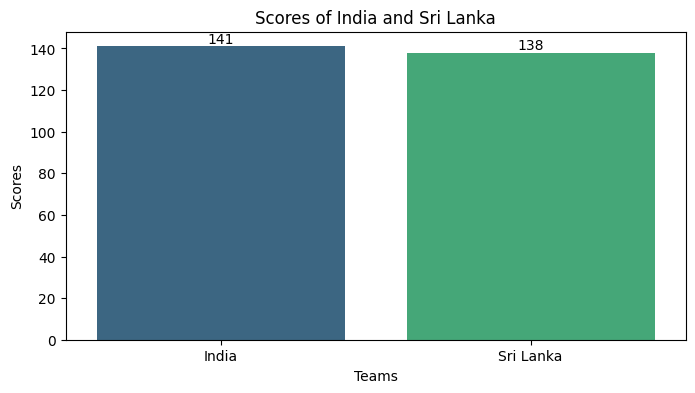

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [130]:
# data
teams = ['India', 'Sri Lanka']
scores = [141, 138]

# visualize
plt.figure(figsize=(8, 4))
sns.barplot(x=teams, y=scores, palette='viridis')
plt.title('Scores of India and Sri Lanka')
plt.xlabel('Teams')
plt.ylabel('Scores')

# add label
for i, score in enumerate(scores):
    plt.text(i, score, str(score), ha='center', va='bottom')

plt.show()
plt

# **Runs scored by Each Batsman**

In [131]:
# runs scored by indian batsman individualy
runs_scored_by_striker = df1[df1['batting_team'] == 'India'].groupby('striker')['runs_off_bat'].sum().reset_index().sort_values(by='runs_off_bat', ascending=False)
runs_scored_by_striker

,striker,runs_off_bat
7,Shubman Gill,39
1,R Parag,26
8,Washington Sundar,25
4,S Dube,13
5,SA Yadav,12
9,YBK Jaiswal,10
3,Ravi Bishnoi,8
2,RK Singh,1
0,Mohammed Siraj,0
6,SV Samson,0


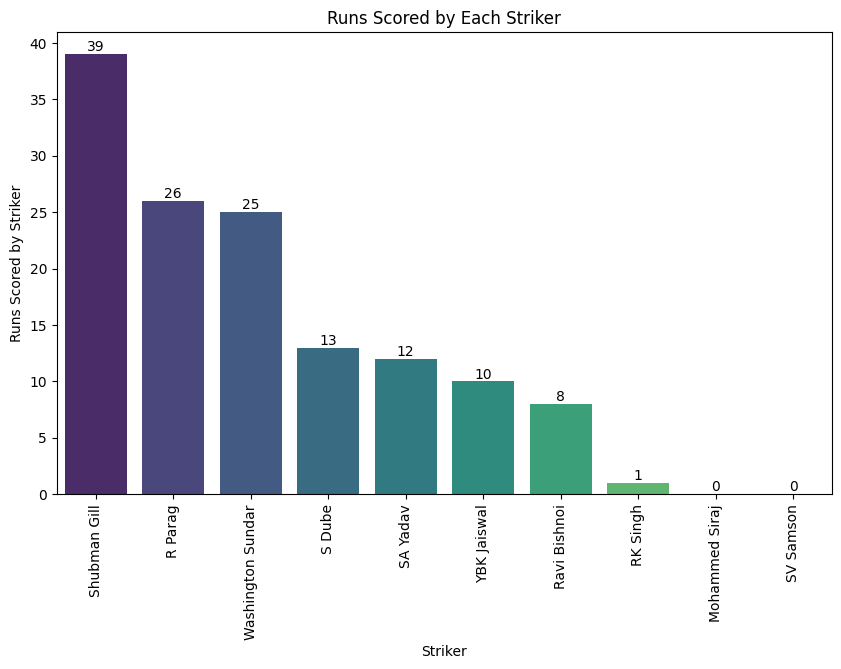

In [132]:
# visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='striker', y='runs_off_bat', data=runs_scored_by_striker, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Striker')
plt.ylabel('Runs Scored by Striker')
plt.title('Runs Scored by Each Striker')

# add label
for i, score in enumerate(runs_scored_by_striker['runs_off_bat']):
    plt.text(i, score, str(score), ha='center', va='bottom')
plt.show()

In [133]:
# runs scored by shrilankan batsman
runs_scored_by_non_striker = df1[df1['batting_team'] == 'Sri Lanka'].groupby('striker')['runs_off_bat'].sum().reset_index().sort_values(by='runs_off_bat', ascending=False)
runs_scored_by_non_striker

,striker,runs_off_bat
5,MDKJ Perera,46
1,BKG Mendis,44
6,P Nissanka,26
2,C Wickramasinghe,4
8,PWH de Silva,3
9,RTM Mendis,3
0,AM Fernando,1
7,PHKD Mendis,1
3,KIC Asalanka,0
4,M Theekshana,0


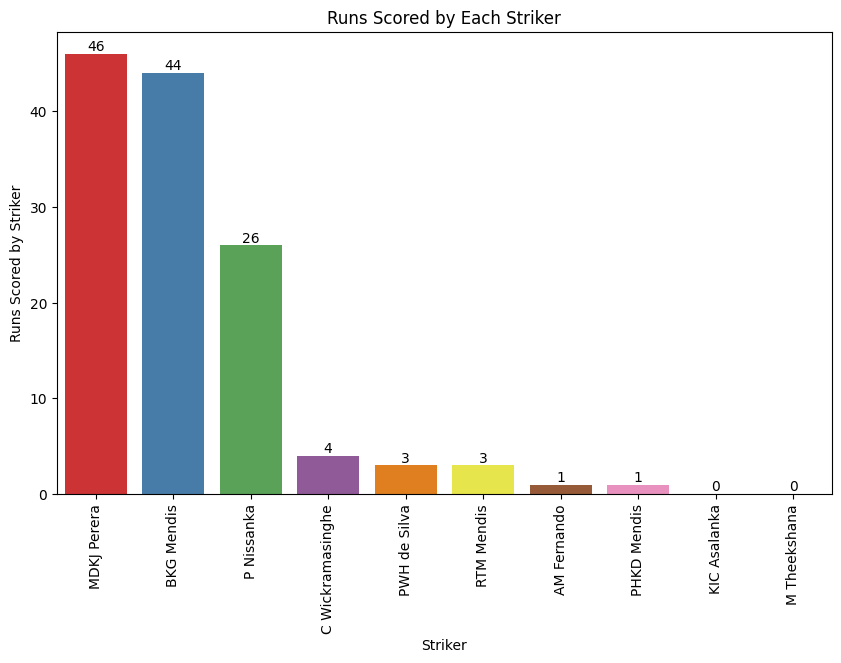

In [134]:
# visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='striker', y='runs_off_bat', data=runs_scored_by_non_striker, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Striker')
plt.ylabel('Runs Scored by Striker')
plt.title('Runs Scored by Each Striker')

# add label
for i, score in enumerate(runs_scored_by_non_striker['runs_off_bat']):
    plt.text(i, score, str(score), ha='center', va='bottom')
plt.show()

# **Wikets**

In [135]:
df1.head()

,start_date,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,legbyes,wicket_type,player_dismissed,boundry
0,2024-07-30,1,0.1,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,0,0,0.0,0.0,Not Out,None,No
1,2024-07-30,1,0.2,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,1,0,0.0,0.0,Not Out,None,No
2,2024-07-30,1,0.3,India,Sri Lanka,Shubman Gill,YBK Jaiswal,C Wickramasinghe,0,0,0.0,0.0,Not Out,None,No
3,2024-07-30,1,0.4,India,Sri Lanka,Shubman Gill,YBK Jaiswal,C Wickramasinghe,1,0,0.0,0.0,Not Out,None,No
4,2024-07-30,1,0.5,India,Sri Lanka,YBK Jaiswal,Shubman Gill,C Wickramasinghe,1,0,0.0,0.0,Not Out,None,No


In [136]:
df1.columns

Index(['start_date', 'innings', 'ball', 'batting_team', 'bowling_team',
       'striker', 'non_striker', 'bowler', 'runs_off_bat', 'extras', 'wides',
       'legbyes', 'wicket_type', 'player_dismissed', 'boundry'],
      dtype='object')

In [137]:
# Indian Team
wickets_by_indian_bowlers = df1[df1['batting_team'] == 'India'].groupby('bowler')['player_dismissed'].count().reset_index().sort_values(by='player_dismissed', ascending=False)
wickets_by_indian_bowlers

,bowler,player_dismissed
2,M Theekshana,26
1,C Wickramasinghe,24
4,PWH de Silva,24
5,RTM Mendis,21
3,PHKD Mendis,18
0,AM Fernando,13


In [138]:
# Filter only rows where a wicket was taken
wickets_df = df[df['wicket_type'].notna()]

# Group by bowler and bowling team, then count the wickets
wickets_count = wickets_df.groupby(['bowler', 'bowling_team']).size().reset_index(name='wickets_taken')

# Display the result
print(wickets_count)

              bowler bowling_team  wickets_taken
0        AM Fernando    Sri Lanka              1
1   C Wickramasinghe    Sri Lanka              1
2       M Theekshana    Sri Lanka              4
3       PWH de Silva    Sri Lanka              2
4           RK Singh        India              2
5         RTM Mendis    Sri Lanka              1
6       Ravi Bishnoi        India              2
7           SA Yadav        India              2
8  Washington Sundar        India              4


In [139]:
# wikets taken by indian bowler
india_wickets = wickets_df[wickets_df['bowling_team'] == 'India'].value_counts('bowler').reset_index()
india_wickets

,bowler,count
0,Washington Sundar,4
1,RK Singh,2
2,Ravi Bishnoi,2
3,SA Yadav,2


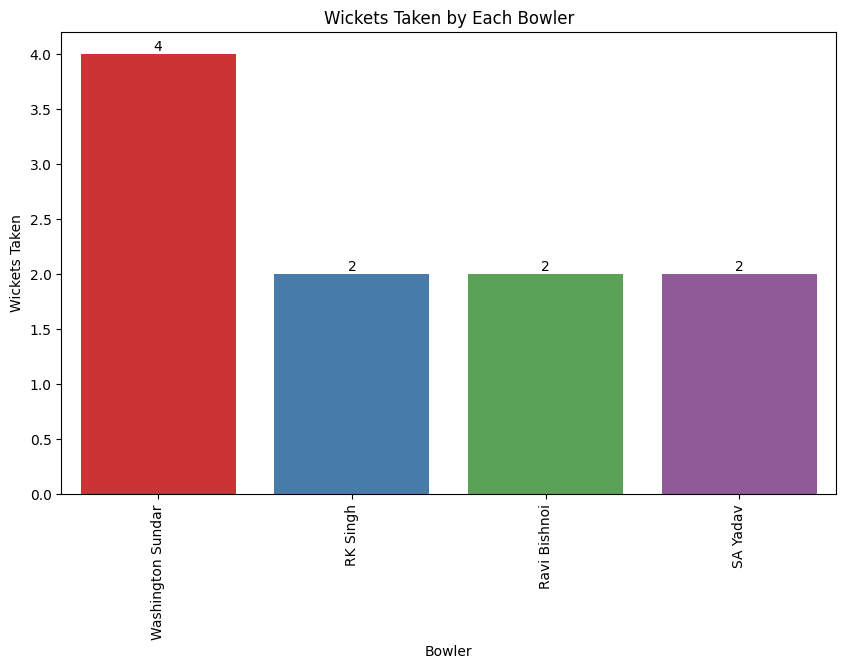

In [140]:
# visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='bowler', y='count', data=india_wickets, palette='Set1')
plt.xticks(rotation=90)
plt.xlabel('Bowler')
plt.ylabel('Wickets Taken')
plt.title('Wickets Taken by Each Bowler')

# add label
for i, score in enumerate(india_wickets['count']):
    plt.text(i, score, str(score), ha='center', va='bottom')
plt.show()


In [141]:
# wickets taken by sri lanka's bowler
shrilanka_wickets = wickets_df[wickets_df['bowling_team'] == 'Sri Lanka'].value_counts('bowler').reset_index()
shrilanka_wickets

,bowler,count
0,M Theekshana,4
1,PWH de Silva,2
2,AM Fernando,1
3,C Wickramasinghe,1
4,RTM Mendis,1


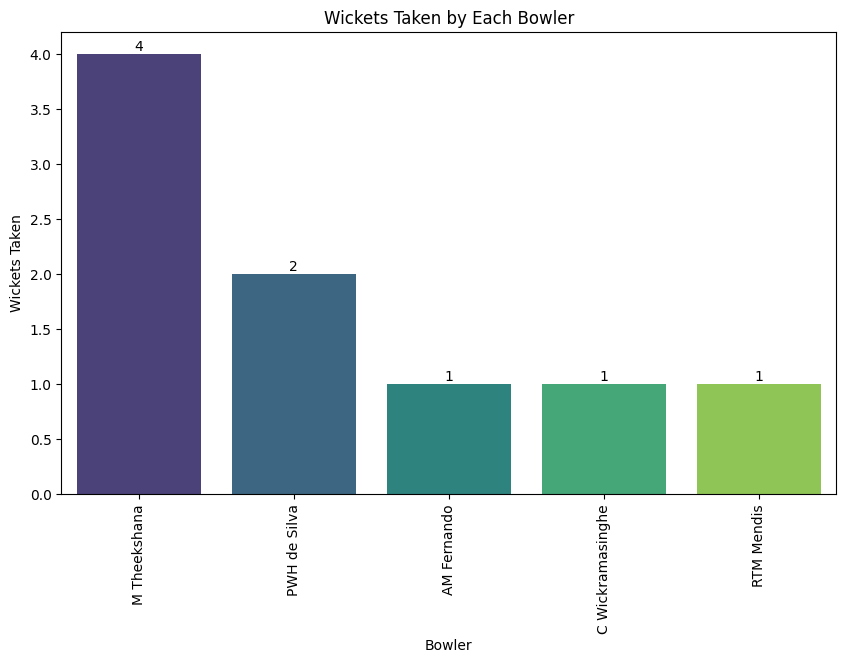

In [142]:
# visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='bowler', y='count', data=shrilanka_wickets, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Bowler')
plt.ylabel('Wickets Taken')
plt.title('Wickets Taken by Each Bowler')

# add label
for i, score in enumerate(shrilanka_wickets['count']):
    plt.text(i, score, str(score), ha='center', va='bottom')
plt.show()

# **Total boundries hit by both Team**

In [144]:
toatl_bountries = df1['boundry'].value_counts()
toatl_bountries

,count
boundry,
No,230
Yes,27


In [145]:
# bountries by india
bountries_by_india = df1[df1['batting_team'] == 'India']['boundry'].value_counts()
bountries_by_india

,count
boundry,
No,112
Yes,14


In [146]:
# boundries by shri lanka
bountries_by_srilanka = df1[df1['batting_team'] == 'Sri Lanka']['boundry'].value_counts()
bountries_by_srilanka

,count
boundry,
No,118
Yes,13


In [147]:
# find out which indian striker hit maximum boundries
# filter rows where boundry is yes
indian_boundries = df1[(df1['batting_team'] == 'India') & (df1['boundry'] == 'Yes')]

# count the number of boundries hit
boundries_hit = indian_boundries['striker'].value_counts()
boundries_hit

,count
striker,
Shubman Gill,3
R Parag,3
Washington Sundar,3
YBK Jaiswal,2
SA Yadav,2
Ravi Bishnoi,1


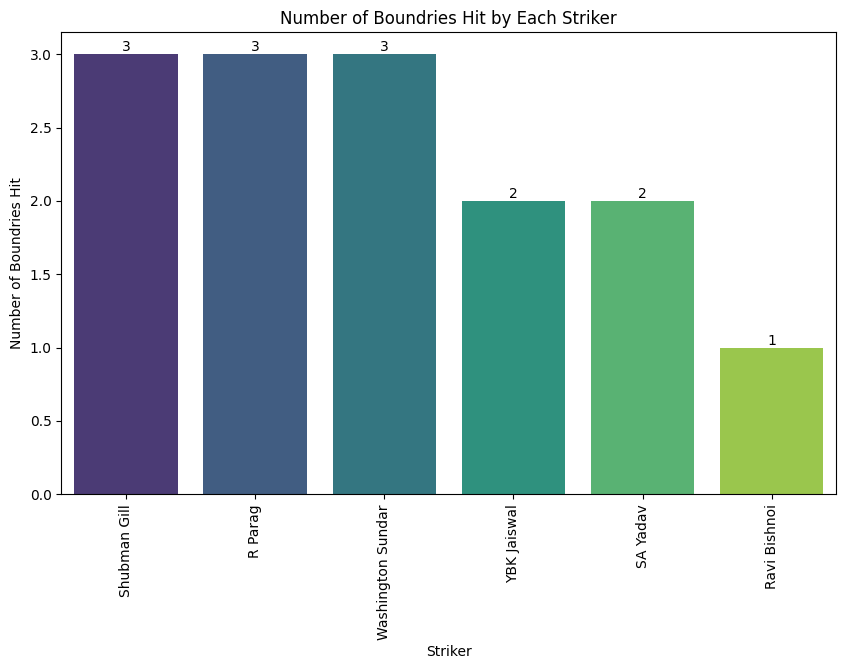

In [148]:
# visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=boundries_hit.index, y=boundries_hit.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Striker')
plt.ylabel('Number of Boundries Hit')
plt.title('Number of Boundries Hit by Each Striker')

# add label
for i, score in enumerate(boundries_hit.values):
    plt.text(i, score, str(score), ha='center', va='bottom')
plt.show()

In [149]:
# find out which indian striker hit maximum boundries
# filter rows where boundry is yes
sl_boundries = df1[(df1['batting_team'] == 'Sri Lanka') & (df1['boundry'] == 'Yes')]

# count the number of boundries hit
sl_boundries_hit = sl_boundries['striker'].value_counts()
sl_boundries_hit

,count
striker,
P Nissanka,5
MDKJ Perera,5
BKG Mendis,3


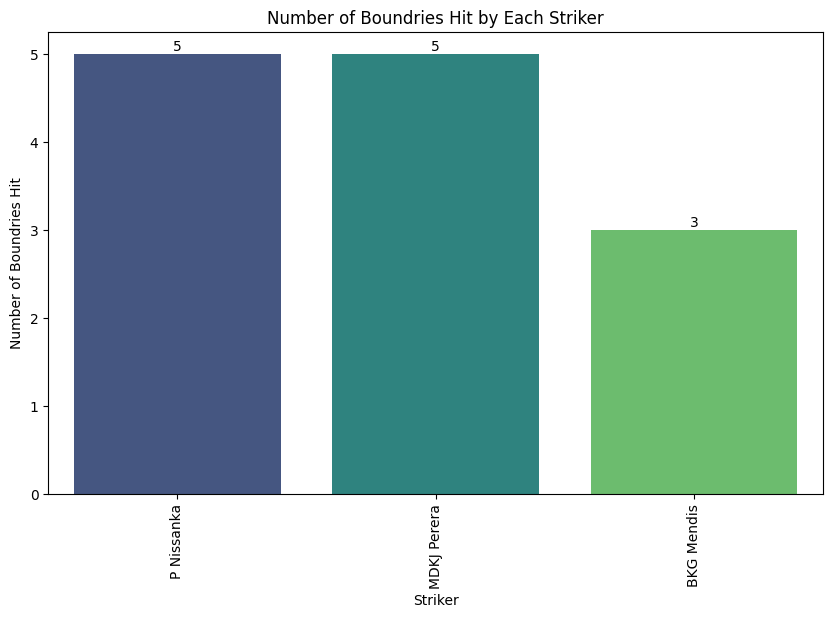

In [150]:
# visualize
plt.figure(figsize=(10, 6))
sns.barplot(x=sl_boundries_hit.index, y=sl_boundries_hit.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Striker')
plt.ylabel('Number of Boundries Hit')
plt.title('Number of Boundries Hit by Each Striker')

# add label
for i, score in enumerate(sl_boundries_hit.values):
    plt.text(i, score, str(score), ha='center', va='bottom')
plt.show()

In [152]:
df1['ball'].head(12)

,ball
0,0.1
1,0.2
2,0.3
3,0.4
4,0.5
5,0.6
6,1.1
7,1.2
8,1.3
9,1.4


In [153]:
# Split the 'ball' column into 'over' and 'ball_in_over'
df1[['over', 'ball_in_over']] = df1['ball'].astype(str).str.split('.', expand=True)

# Convert the new columns to integers
df1['over'] = df1['over'].astype(int)
df1['ball_in_over'] = df1['ball_in_over'].astype(int)

# Display the updated DataFrame
print(df1.head())


  start_date  innings  ball batting_team bowling_team       striker  \
0 2024-07-30        1   0.1        India    Sri Lanka   YBK Jaiswal   
1 2024-07-30        1   0.2        India    Sri Lanka   YBK Jaiswal   
2 2024-07-30        1   0.3        India    Sri Lanka  Shubman Gill   
3 2024-07-30        1   0.4        India    Sri Lanka  Shubman Gill   
4 2024-07-30        1   0.5        India    Sri Lanka   YBK Jaiswal   

    non_striker            bowler  runs_off_bat  extras  wides  legbyes  \
0  Shubman Gill  C Wickramasinghe             0       0    0.0      0.0   
1  Shubman Gill  C Wickramasinghe             1       0    0.0      0.0   
2   YBK Jaiswal  C Wickramasinghe             0       0    0.0      0.0   
3   YBK Jaiswal  C Wickramasinghe             1       0    0.0      0.0   
4  Shubman Gill  C Wickramasinghe             1       0    0.0      0.0   

  wicket_type player_dismissed boundry  over  ball_in_over  
0     Not Out             None      No     0             1  


In [154]:
#find out number of balls played by indian striker and runs scored
# Filter rows where the batting team is India
indian_strikers = df1[df1['batting_team'] == 'India']

# Group by striker and aggregate the number of balls played and runs scored
striker_stats = indian_strikers.groupby('striker').agg({
    'ball_in_over': 'count',  # Count the number of balls played
    'runs_off_bat': 'sum'  # Sum the runs scored
}).reset_index()

# Rename columns for clarity
striker_stats.rename(columns={'ball_in_over': 'balls_played', 'runs_off_bat': 'runs_scored'}, inplace=True)

print(striker_stats)


             striker  balls_played  runs_scored
0     Mohammed Siraj             1            0
1            R Parag            19           26
2           RK Singh             3            1
3       Ravi Bishnoi             9            8
4             S Dube            15           13
5           SA Yadav            10           12
6          SV Samson             4            0
7       Shubman Gill            38           39
8  Washington Sundar            18           25
9        YBK Jaiswal             9           10


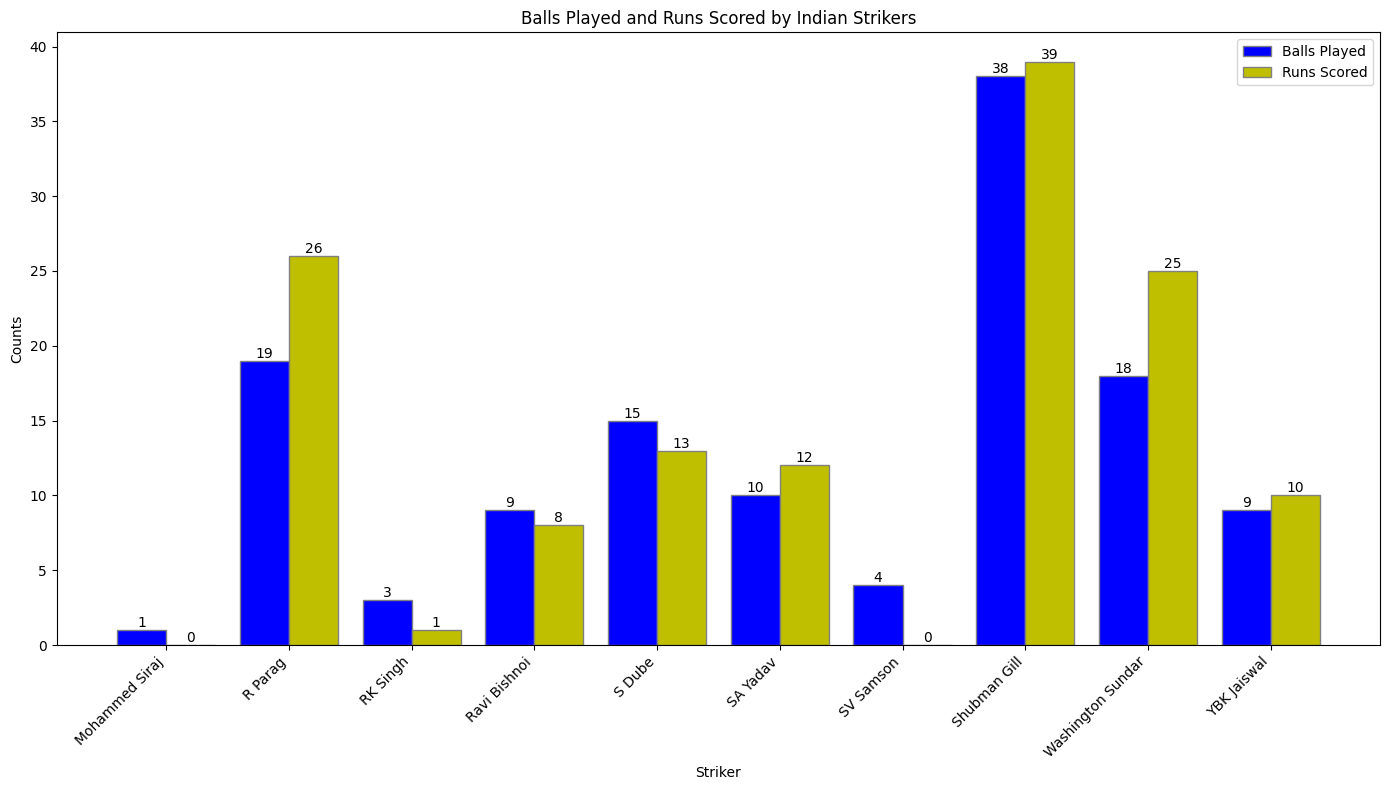

In [155]:
# Number of strikers
num_strikers = len(striker_stats['striker'])

# Bar width
bar_width = 0.4

# X locations for the groups
r1 = np.arange(num_strikers)
r2 = r1 + bar_width

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars for balls played
bars1 = ax.bar(r1, striker_stats['balls_played'], color='b', width=bar_width, edgecolor='grey', label='Balls Played')


# Create bars for runs scored
bars2 = ax.bar(r2, striker_stats['runs_scored'], color='y', width=bar_width, edgecolor='grey', label='Runs Scored')


# Add labels and title
ax.set_xlabel('Striker')
ax.set_ylabel('Counts')
ax.set_title('Balls Played and Runs Scored by Indian Strikers')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(striker_stats['striker'], rotation=45, ha='right')
ax.legend()

# add label
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()


In [156]:
#find out number of balls played by indian striker and runs scored
# Filter rows where the batting team is India
sl_strikers = df1[df1['batting_team'] == 'Sri Lanka']

# Group by striker and aggregate the number of balls played and runs scored
striker_stats_sl = sl_strikers.groupby('striker').agg({
    'ball_in_over': 'count',  # Count the number of balls played
    'runs_off_bat': 'sum'  # Sum the runs scored
}).reset_index()

# Rename columns for clarity
striker_stats_sl.rename(columns={'ball_in_over': 'balls_played', 'runs_off_bat': 'runs_scored'}, inplace=True)

print(striker_stats_sl)


            striker  balls_played  runs_scored
0       AM Fernando             1            1
1        BKG Mendis            45           44
2  C Wickramasinghe             2            4
3      KIC Asalanka             1            0
4      M Theekshana             1            0
5       MDKJ Perera            37           46
6        P Nissanka            28           26
7       PHKD Mendis             3            1
8      PWH de Silva             4            3
9        RTM Mendis             9            3


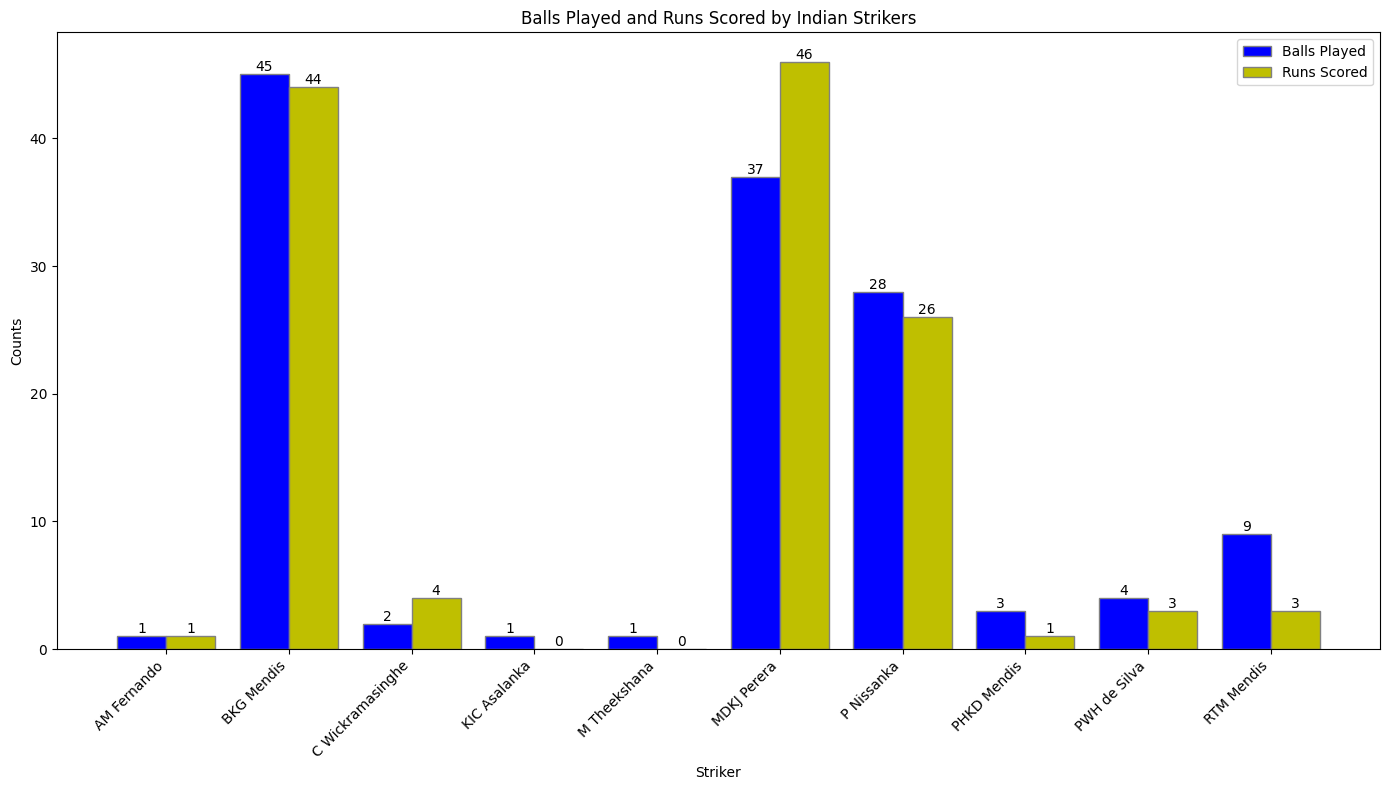

In [157]:
# Number of strikers
num_strikers = len(striker_stats_sl['striker'])

# Bar width
bar_width = 0.4

# X locations for the groups
r1 = np.arange(num_strikers)
r2 = r1 + bar_width

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(14, 8))

# Create bars for balls played
bars1 = ax.bar(r1, striker_stats_sl['balls_played'], color='b', width=bar_width, edgecolor='grey', label='Balls Played')


# Create bars for runs scored
bars2 = ax.bar(r2, striker_stats_sl['runs_scored'], color='y', width=bar_width, edgecolor='grey', label='Runs Scored')


# Add labels and title
ax.set_xlabel('Striker')
ax.set_ylabel('Counts')
ax.set_title('Balls Played and Runs Scored by Indian Strikers')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(striker_stats_sl['striker'], rotation=45, ha='right')
ax.legend()

# add label
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

# **Progress Report**

In [158]:
# calculate runs in each obve by india

runs_in_each_over_by_india = df1[df1['batting_team'] == 'India'].groupby('over')['runs_off_bat'].sum().reset_index()
runs_in_each_over_by_india

,over,runs_off_bat
0,0,7
1,1,8
2,2,2
3,3,7
4,4,7
5,5,2
6,6,5
7,7,8
8,8,7
9,9,6


In [159]:
# take cumulative sum of india runs
runs_in_each_over_by_india['cumulative_runs'] = runs_in_each_over_by_india['runs_off_bat'].cumsum()
runs_in_each_over_by_india

,over,runs_off_bat,cumulative_runs
0,0,7,7
1,1,8,15
2,2,2,17
3,3,7,24
4,4,7,31
5,5,2,33
6,6,5,38
7,7,8,46
8,8,7,53
9,9,6,59


In [160]:
# calculate runs by shri lanka in each over
runs_in_each_over_by_srilanka = df1[df1['batting_team'] == 'Sri Lanka'].groupby('over')['runs_off_bat'].sum().reset_index()
runs_in_each_over_by_srilanka

,over,runs_off_bat
0,0,2
1,1,2
2,2,15
3,3,5
4,4,6
5,5,4
6,6,10
7,7,5
8,8,7
9,9,3


In [161]:
# take cumulative sum of shrilanka runs
runs_in_each_over_by_srilanka['cumulative_runs'] = runs_in_each_over_by_srilanka['runs_off_bat'].cumsum()
runs_in_each_over_by_srilanka


,over,runs_off_bat,cumulative_runs
0,0,2,2
1,1,2,4
2,2,15,19
3,3,5,24
4,4,6,30
5,5,4,34
6,6,10,44
7,7,5,49
8,8,7,56
9,9,3,59


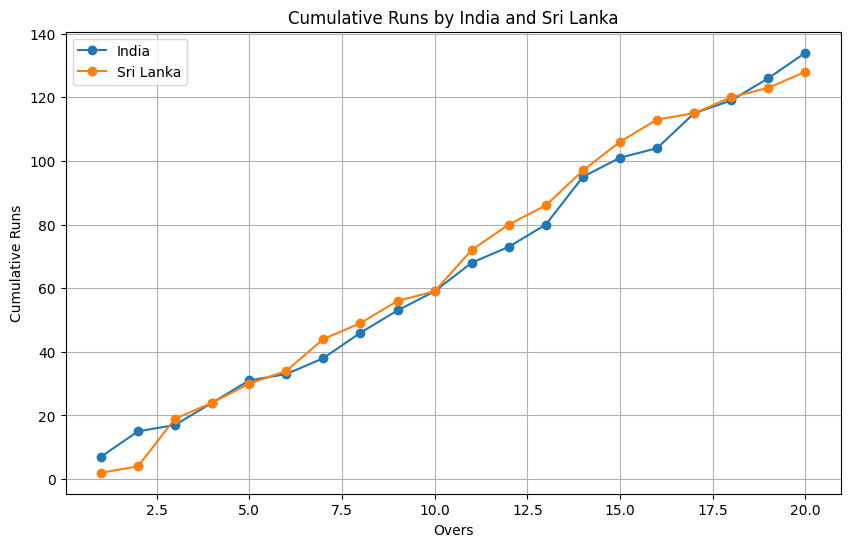

In [163]:
# data
teams = ['India', 'Sri Lanka']
overs = list(range(1, 21))
runs_india = runs_in_each_over_by_india['cumulative_runs']
runs_srilanka = runs_in_each_over_by_srilanka['cumulative_runs']

# visualize
plt.figure(figsize=(10, 6))
plt.plot(overs, runs_india, label='India', marker='o')
plt.plot(overs, runs_srilanka, label='Sri Lanka', marker='o')
plt.xlabel('Overs')
plt.ylabel('Cumulative Runs')
plt.title('Cumulative Runs by India and Sri Lanka')
plt.legend()
plt.grid(True)
plt.show()



### ***Thank You***